# Challenge - Preparing a Dataset for Modeling
---------------------

# Human Resources Analytics
## Source of data (gathered September 2018):
 - [https://www.kaggle.com/jaishofficial/human-resources-analytics](https://www.kaggle.com/jaishofficial/human-resources-analytics)

## Date:  October 10, 2018
-----------------------

# Contents

- [Import Modules and Load Data](#Import-Modules-and-Load-Data)

- [What Does the Data Look Like?](#What-Does-the-Data-Look-Like?)

- [Clean the Data](#Clean-the-Data)

- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

- [Variables of Interest](#Variables-of-Interest)

- [Additional Features](#Additional-Features)

- [Filtering Features](#Filtering-Features)

-------------------
# Import Modules and Load Data
## Import modules and enable the display of plots in this notebook

In [1]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Ignore harmless seaborn warnings

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load the dataset into a DataFrame

In [3]:
file = 'HR_comma_sep.csv'
hr = pd.read_csv(file)

-------------------
# What Does the Data Look Like?

## What is the shape of the dataset?

In [4]:
hr.shape

(14999, 10)

## What information can be quickly learned about the dataset?

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## How is the dataset structured?

In [6]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


--------------------
# Clean the Data

In [8]:
hr = hr.rename(index=str, columns={'average_montly_hours': 'avg_monthly_hours', 'sales': 'dept'})

In [9]:
hr.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


------------------
# Exploratory Data Analysis

## What are some statistics for columns with numerical data?

In [10]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## How does the data vary in columns with numerical data?

In [11]:
hr.var().nlargest(10)

avg_monthly_hours        2494.313175
time_spend_company          2.131998
number_project              1.519284
left                        0.181411
Work_accident               0.123706
satisfaction_level          0.061817
last_evaluation             0.029299
promotion_last_5years       0.020817
dtype: float64

## What sorts of possible correlations in the data become more apparent in a pairplot?

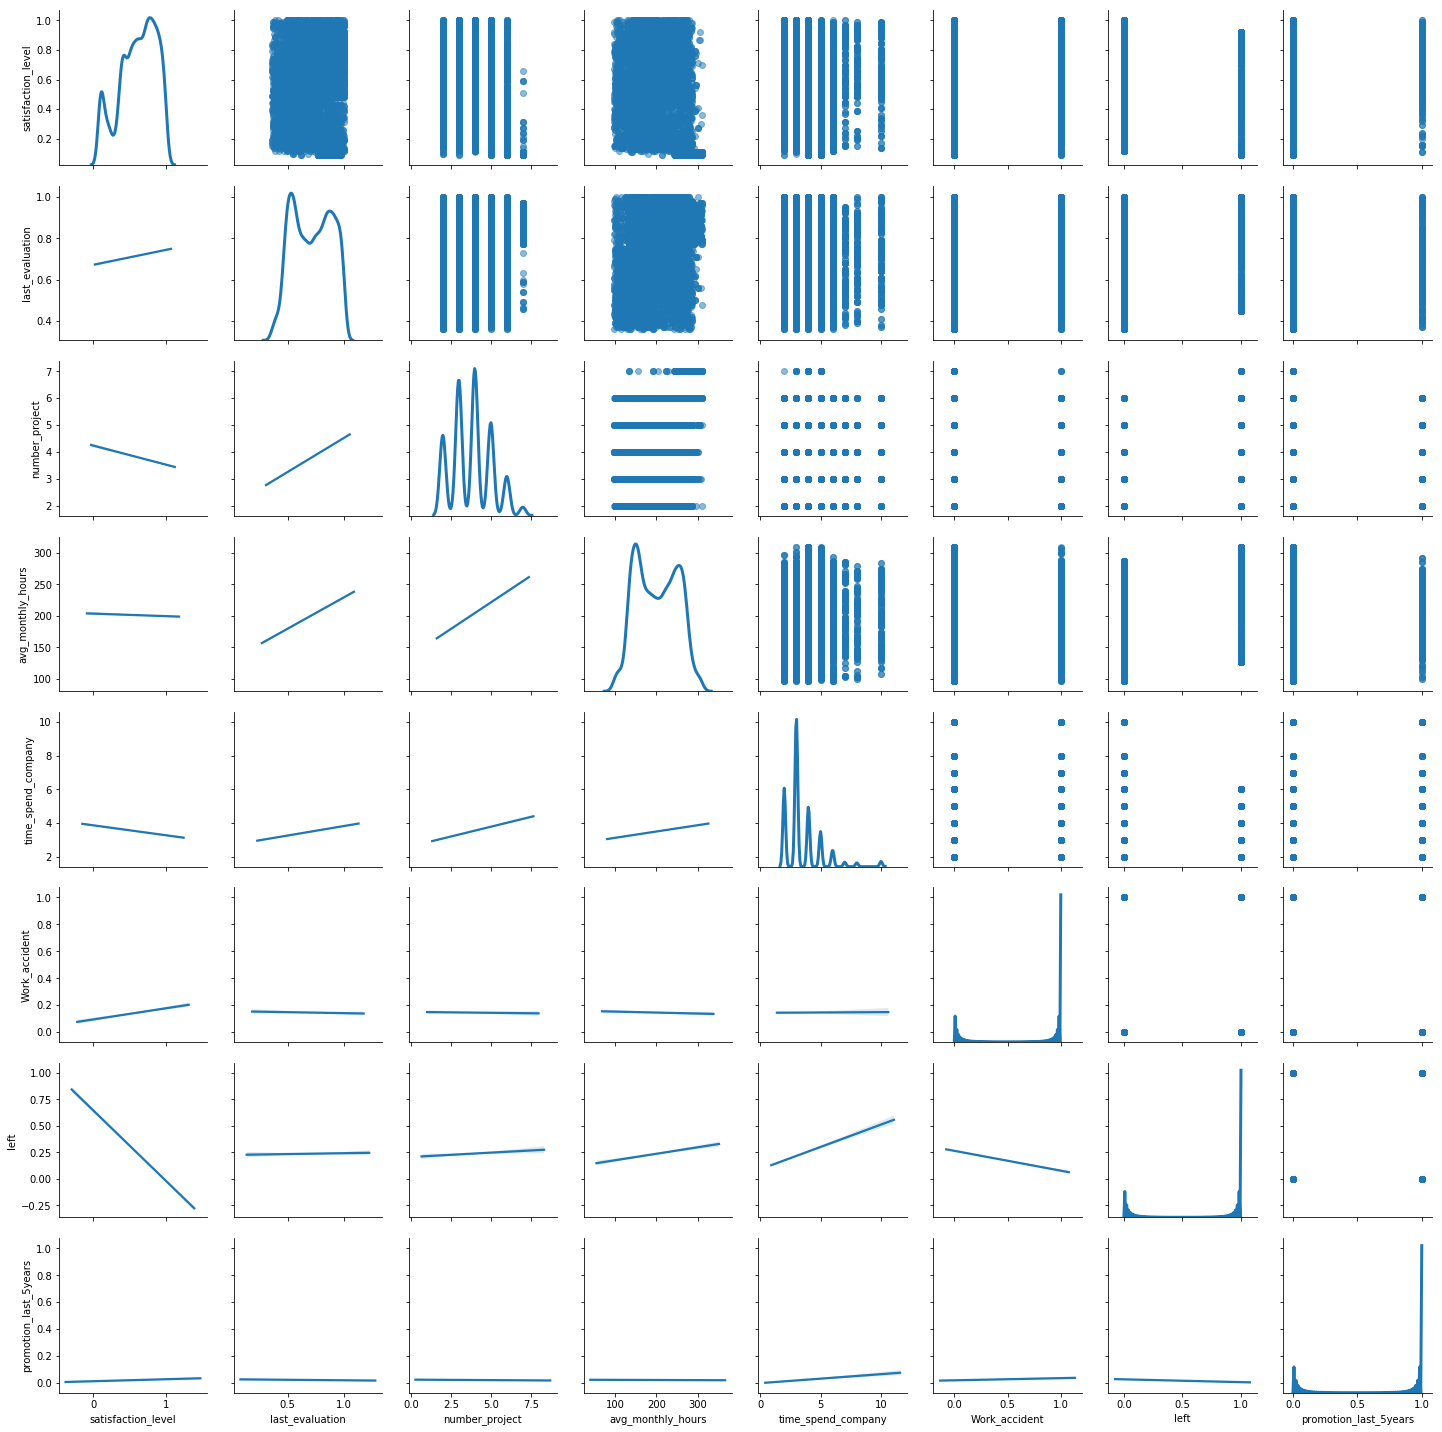

In [12]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(hr.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

## What does a correlation matrix look like?

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
avg_monthly_hours               -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       avg_monthly_hours  time_spend_company  Work_accident  \
satisfaction_level             -0.020048           -0.100866       0.058697   
last_evaluation                 0.339742            0.131591      -0.007104   
number_project                  0.417211            0.196786

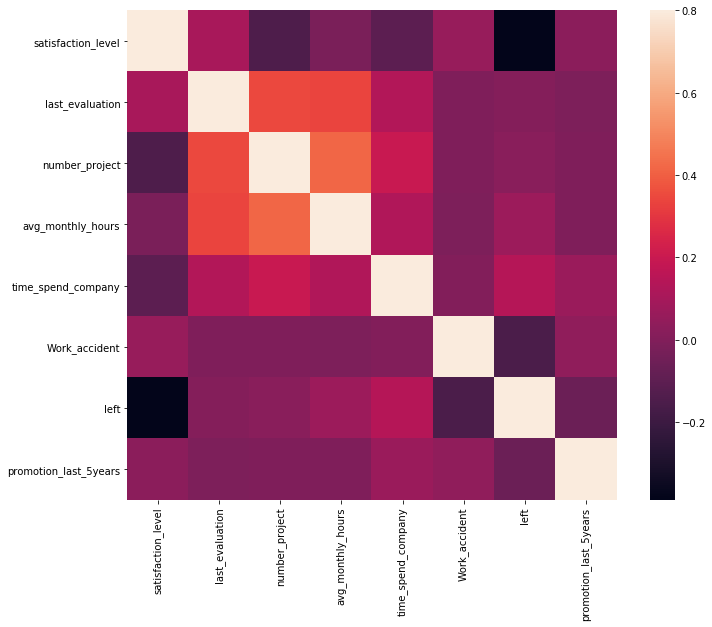

In [13]:
# Make the correlation matrix.
corrmat = hr.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Variables of Interest

##  Select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far. 

###### Outcome variable:
   - 'salary'

###### Categorical / Continuous variables:
   - 'dept'
   - 'satisfaction_level'
   - 'last_evaluation'
   - 'number_project'
   - 'avg_monthly_hours'
   - 'time_spend_company'

## How many employees in each department fall into each salary tier?

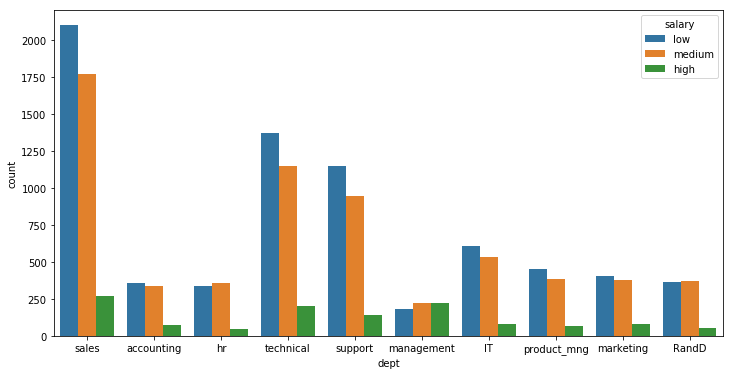

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='dept', hue='salary', data=hr)
plt.show()

## How does satisfaction level vary among different salary tiers?

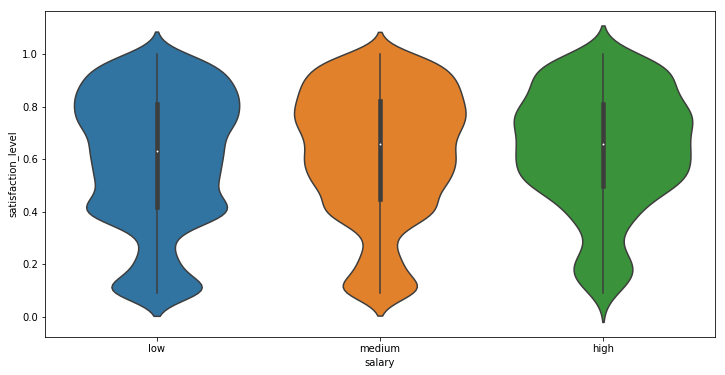

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='salary', y='satisfaction_level', data=hr)
plt.show()

## How do employees' last evaluations vary among different salary tiers?

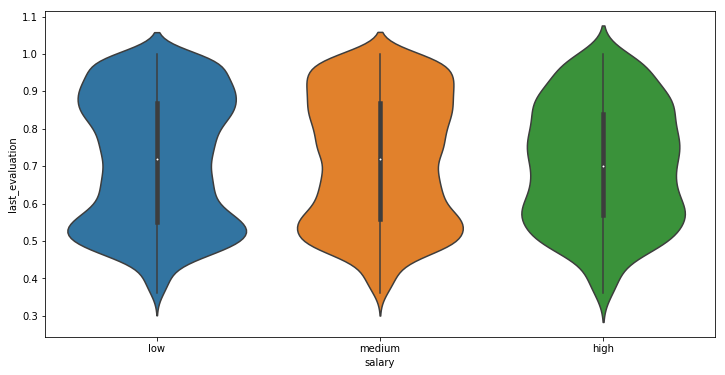

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='salary', y='last_evaluation', data=hr)
plt.show()

## How many projects are employees in different salary tiers involved with?

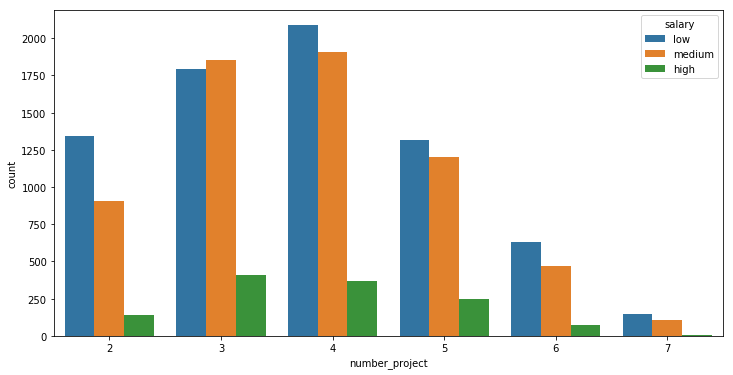

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='number_project', hue='salary', data=hr)
plt.show()

## How do employees' average monthly hours vary among different salary tiers?

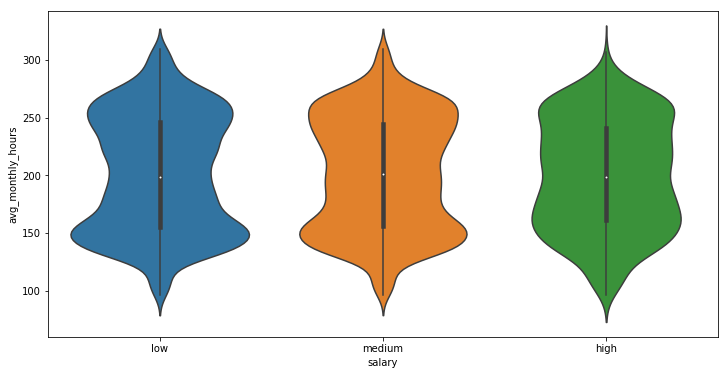

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='salary', y='avg_monthly_hours', data=hr)
plt.show()

## Based on time spent with the company, how many employees fall into each salary tier?

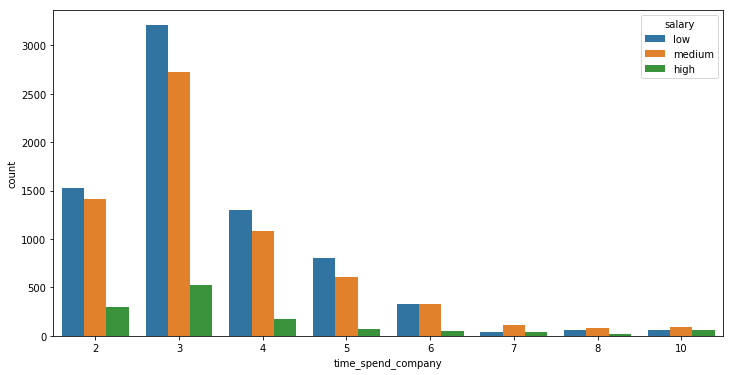

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='time_spend_company', hue='salary', data=hr)
plt.show()

# Additional Features

###### Adding 10 Features (possible features to help predict salary level before exploring data)
    1 - last_evaluation, number_project, avg_monthly_hours - somewhat correlated variables combined into one feature
    2 - the above combined feature at/above its average - values at/above average may help predict salary level
    3 - satisfaction_level at/above average - values at/above average may help predict salary level
    4 - last_evaluation at/above average - values at/above average may help predict salary level
    5 - number_project at/above average - values at/above average may help predict salary level
    6 - avg_monthly_hours at/above average - values at/above average may help predict salary level
    7 - time_spend_company at/above average - values at/above average may help predict salary level
    8 - time_spend_company >= 7 years - values at/above 7 may help predict salary level
    9 - dept = 'management' - there seems to be a difference between the salary level distributions of managaement vs. other departments
    10 - dept = 'sales' or 'technical' or 'support' - there may/may not be a difference in salary level distributions for employees in these departments

In [45]:
features = pd.get_dummies(hr['salary'])

In [46]:
means = hr[['last_evaluation','number_project','avg_monthly_hours']].mean(axis=0)
stds = hr[['last_evaluation','number_project','avg_monthly_hours']].std(axis=0)

In [47]:
features['eval_proj_hours'] = ((hr[['last_evaluation','number_project','avg_monthly_hours']] - means) / stds).mean(axis=1)
features['eval_proj_hours_gte_avg'] = np.where(features['eval_proj_hours'] >= features['eval_proj_hours'].mean(), 1, 0)
features['sat_lvl_gte_avg'] = np.where(hr['satisfaction_level'] >= hr['satisfaction_level'].mean(), 1, 0)
features['last_eval_gte_avg'] = np.where(hr['last_evaluation'] >= hr['last_evaluation'].mean(), 1, 0)
features['num_proj_gte_avg'] = np.where(hr['number_project'] >= hr['number_project'].mean(), 1, 0)
features['monthly_hrs_gte_avg'] = np.where(hr['avg_monthly_hours'] >= hr['avg_monthly_hours'].mean(), 1, 0)
features['time_w_co_gte_avg'] = np.where(hr['time_spend_company'] >= hr['time_spend_company'].mean(), 1, 0)
features['time_w_co_gte_7'] = np.where(hr['time_spend_company'] >= 7, 1, 0)
features['dept_is_mgmt'] = np.where(hr['dept'] == 'management', 1, 0)
features['dept_is_sales_tech_supp'] = np.where(hr['dept'].isin(['sales', 'technical', 'support']), 1, 0)

# Filtering Features

In [49]:
features.head()

,high,low,medium,eval_proj_hours,eval_proj_hours_gte_avg,sat_lvl_gte_avg,last_eval_gte_avg,num_proj_gte_avg,monthly_hrs_gte_avg,time_w_co_gte_avg,time_w_co_gte_7,dept_is_mgmt,dept_is_sales_tech_supp
0,0,1,0,-1.144021,0,0,0,0,0,0,0,0,1
1,0,0,1,1.010714,1,1,1,1,1,1,0,0,1
2,0,0,1,1.657270,1,0,1,1,1,1,0,0,1
3,0,1,0,0.769892,1,1,1,1,1,1,0,0,1
4,0,1,0,-1.150147,0,0,0,0,0,0,0,0,1
